# INPUT DATA

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = "/content/drive/MyDrive/online_retail.csv"
df = pd.read_csv(path)
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# DATA UNDERSTANDING



In [3]:
# Struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [4]:
# Missing Value
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


initial data inspection shows missing data in "Description" and "CustomerID"

In [5]:
# Summary
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


The dataset was initially inspected to understand its structure and data quality.
Several issues were identified during this phase:

- Missing values in the `CustomerID` column
- Non-positive values in `Quantity` and `UnitPrice`
- Inconsistent product descriptions

These issues will be addressed during the data cleaning stage based on the analytical objective of customer-level revenue and retention analysis.




# DATA CLEANING

## Valid Transaction Filtering (dropping non-positive value in `Quantity` and `UnitPrice`)

In [7]:
# Check how many rows have non-positive Quantity or UnitPrice
invalid_qty = (df['Quantity'] <= 0).sum()
invalid_price = (df['UnitPrice'] <= 0).sum()

invalid_qty, invalid_price

(np.int64(10624), np.int64(2517))

In [8]:
# Keep only valid transactions
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

# Verify no non-positive values remain
(df_clean['Quantity'] <= 0).sum(), (df_clean['UnitPrice'] <= 0).sum()

(np.int64(0), np.int64(0))

## Dropping Missing `CustomerID`

In [9]:
# Check missing CustomerID
missing_cust = df_clean['CustomerID'].isna().sum()
missing_cust

np.int64(132220)

In [10]:
# Remove rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID']).copy()

# Verify no missing CustomerID remains
df_clean['CustomerID'].isna().sum()

np.int64(0)

## Date Formatting in `InvoiceDate`

In [11]:
# Convert to datetime first (kalau belum)
df_clean['InvoiceDate'] = pd.to_datetime(
    df_clean['InvoiceDate'],
    format='%m/%d/%Y %H:%M'
)

# Keep date only (remove time)
df_clean['InvoiceDate'] = df_clean['InvoiceDate'].dt.date

In [ ]:
df_clean.info()
df_clean['InvoiceDate'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        397884 non-null  int64  
 1   InvoiceNo    397884 non-null  object 
 2   StockCode    397884 non-null  object 
 3   Description  397884 non-null  object 
 4   Quantity     397884 non-null  int64  
 5   InvoiceDate  397884 non-null  object 
 6   UnitPrice    397884 non-null  float64
 7   CustomerID   397884 non-null  float64
 8   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 30.4+ MB


,InvoiceDate
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01


# DATA UNDERSTANDING (CLEANED DATA)

In [12]:
# Data Structured
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        397884 non-null  int64  
 1   InvoiceNo    397884 non-null  object 
 2   StockCode    397884 non-null  object 
 3   Description  397884 non-null  object 
 4   Quantity     397884 non-null  int64  
 5   InvoiceDate  397884 non-null  object 
 6   UnitPrice    397884 non-null  float64
 7   CustomerID   397884 non-null  float64
 8   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 30.4+ MB


In [13]:
# Missing Value
df_clean.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [14]:
# Summary
df_clean.describe()

,index,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,278462.993893,12.988238,3.116488,15294.423453
std,152770.852038,179.331775,22.097877,1713.141560
min,0.000000,1.000000,0.001000,12346.000000
25%,148333.750000,2.000000,1.250000,13969.000000
50%,284902.500000,6.000000,1.950000,15159.000000
75%,410074.250000,12.000000,3.750000,16795.000000
max,541908.000000,80995.000000,8142.750000,18287.000000


After the cleaning process, the data was **reduced to 397,884 data points from 541,909 data points.**

# ADDITIONAL FEATURES

## Adding `TotalAmount` Column
Created by multiplying `Quantity` and `UnitPrice`
to represent the actual monetary value of each transaction.

In [15]:
# Create TotalAmount column
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [17]:
df_clean[['Quantity', 'UnitPrice', 'TotalAmount']].head()

,Quantity,UnitPrice,TotalAmount
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


## Adding Reference Date

The reference date was defined as one day after the latest transaction date
to simulate the point in time immediately following the observed data period

In [16]:
# Check the latest transaction date
df_clean['InvoiceDate'].max()

datetime.date(2011, 12, 9)

In [18]:
# Define reference date
reference_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

print(f"Reference Date for RFM analysis: {reference_date}")

Reference Date for RFM analysis: 2011-12-10


## Top Products

In [19]:
df_clean.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(5)


,TotalAmount
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73


## Top Country

In [20]:
df_clean.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(5)

,TotalAmount
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050


# RFM MEASURING (FOR EACH CUSTOMER)

In [ ]:
rfm = df_clean.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalAmount', 'sum')
).reset_index()

rfm.head()

rfm['CustomerID'] = rfm['CustomerID'].astype(str)

In [ ]:
# RFM Sanity Check
rfm.describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,4.272015,2054.266460
std,100.012264,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.750000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


# CUSTOMER REVENUE ANALYSIS

## Total Revenue Overview

In [ ]:
total_revenue = rfm['Monetary'].sum()
total_customers = rfm.shape[0]
avg_revenue_per_customer = total_revenue / total_customers

print(f"Total revenue: {total_revenue}")
print(f"Total customers: {total_customers}")
print(f"Average revenue per customer: {avg_revenue_per_customer}")

Total revenue: 8911407.904
Total customers: 4338
Average revenue per customer: 2054.2664601198708


The dataset contains 4338 customers with a total revenue of
8,911,407.904 USD. On average, each customer contributes about 2,054.27 USD
to total revenue.


## Revenue Distribution

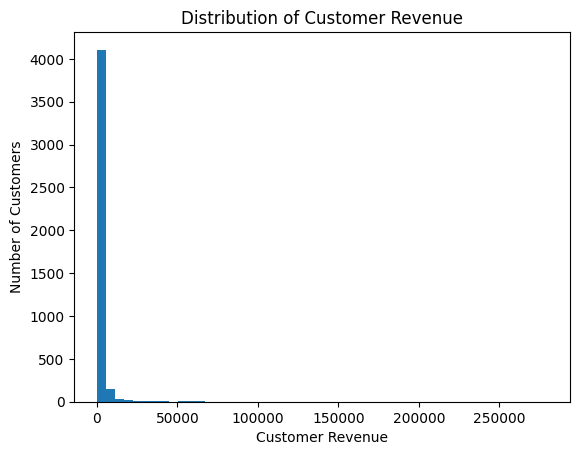

In [ ]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(rfm['Monetary'], bins=50)
plt.xlabel('Customer Revenue')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Revenue')
plt.show()

### Pareto Analysis

In [ ]:
import numpy as np

rfm_sorted = rfm.sort_values(by='Monetary', ascending=False)

rfm_sorted['CumulativeRevenue'] = rfm_sorted['Monetary'].cumsum()
rfm_sorted['CumulativeRevenuePct'] = (
    rfm_sorted['CumulativeRevenue'] / total_revenue
)

rfm_sorted['CustomerPct'] = (
    (np.arange(1, total_customers + 1)) / total_customers
)

rfm_sorted.head()


,CustomerID,Recency,Frequency,Monetary,CumulativeRevenue,CumulativeRevenuePct,CustomerPct
1689,14646.0,2,73,280206.02,280206.02,0.031444,0.000231
4201,18102.0,1,60,259657.30,539863.32,0.060581,0.000461
3728,17450.0,9,46,194550.79,734414.11,0.082413,0.000692
3008,16446.0,1,2,168472.50,902886.61,0.101318,0.000922
1879,14911.0,2,201,143825.06,1046711.67,0.117457,0.001153


### Pareto Chart

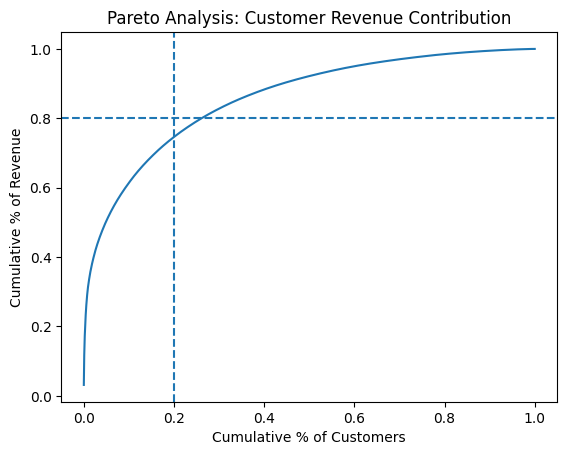

In [ ]:
plt.plot(rfm_sorted['CustomerPct'], rfm_sorted['CumulativeRevenuePct'])
plt.axhline(0.8, linestyle='--')
plt.axvline(0.2, linestyle='--')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Revenue')
plt.title('Pareto Analysis: Customer Revenue Contribution')
plt.show()

In [ ]:
rfm_sorted[rfm_sorted['CumulativeRevenuePct'] <= 0.8].shape[0] / total_customers

0.26094974642692487

Approximately **26%** of customers contribute around **80%** of total revenue

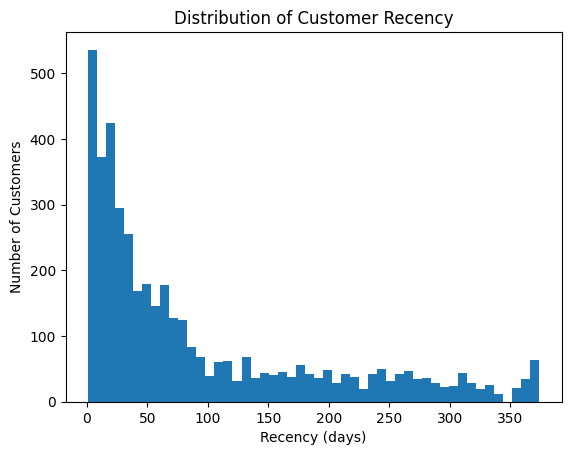

In [ ]:
import matplotlib.pyplot as plt

plt.hist(rfm['Recency'], bins=50)
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Recency')
plt.show()

# RFM SCORING

In [ ]:
# RFM Scoring using quantiles (robust to skewness)

rfm['R_Score'] = pd.qcut(
    rfm['Recency'], 5, duplicates='drop'
)

rfm['F_Score'] = pd.qcut(
    rfm['Frequency'], 5, duplicates='drop'
)

rfm['M_Score'] = pd.qcut(
    rfm['Monetary'], 5, duplicates='drop'
)


rfm[['R_Score','F_Score','M_Score']].head()

,R_Score,F_Score,M_Score
0,"(180.0, 374.0]","(0.999, 2.0]","(2058.426, 280206.02]"
1,"(0.999, 13.8]","(6.0, 209.0]","(2058.426, 280206.02]"
2,"(72.0, 180.0]","(3.0, 6.0]","(942.276, 2058.426]"
3,"(13.8, 33.0]","(0.999, 2.0]","(942.276, 2058.426]"
4,"(180.0, 374.0]","(0.999, 2.0]","(250.194, 490.096]"


In [ ]:
rfm['R_Score'] = rfm['R_Score'].cat.codes
rfm['F_Score'] = rfm['F_Score'].cat.codes
rfm['M_Score'] = rfm['M_Score'].cat.codes

In [ ]:
rfm['R_Score'] = rfm['R_Score'].max() - rfm['R_Score']

## RFM Preview

In [ ]:
rfm[['R_Score','F_Score','M_Score']].describe()
rfm[['R_Score','F_Score','M_Score']].head()

,R_Score,F_Score,M_Score
0,0,0,4
1,4,3,4
2,1,2,3
3,3,0,3
4,0,0,1


In [ ]:
rfm[['R_Score','F_Score','M_Score']].describe()

,R_Score,F_Score,M_Score
count,4338.000000,4338.000000,4338.00000
mean,2.006455,0.970954,2.00000
std,1.413220,1.168957,1.41454
min,0.000000,0.000000,0.00000
25%,1.000000,0.000000,1.00000
50%,2.000000,0.000000,2.00000
75%,3.000000,2.000000,3.00000
max,4.000000,3.000000,4.00000


## Profiling Based on RFM Score

In [ ]:
def assign_customer_profile(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 2 and row['M_Score'] >= 2:
        return 'Potential Loyalist'
    elif row['R_Score'] <= 1 and row['M_Score'] >= 3:
        return 'At Risk High Value'
    elif row['R_Score'] >= 3 and row['F_Score'] <= 1:
        return 'New Customers'
    else:
        return 'Lost / Low Engagement'

rfm['CustomerProfile'] = rfm.apply(assign_customer_profile, axis=1)

## Customer Distribution

In [ ]:
rfm['CustomerProfile'].value_counts()

,count
CustomerProfile,
Lost / Low Engagement,2262
New Customers,720
Loyal,571
Potential Loyalist,445
At Risk High Value,340


## Revenue Distribution

In [ ]:
rfm.groupby('CustomerProfile')['Monetary'].sum().sort_values(ascending=False)

,Monetary
CustomerProfile,
Loyal,4943874.730
Lost / Low Engagement,1635507.942
At Risk High Value,844865.461
Potential Loyalist,824025.301
New Customers,663134.470


## Recency Distribution

In [ ]:
rfm.groupby('CustomerProfile')['Recency'].mean().sort_values(ascending=False)

,Recency
CustomerProfile,
Lost / Low Engagement,145.313439
At Risk High Value,143.585294
New Customers,17.744444
Potential Loyalist,15.366292
Loyal,11.488616


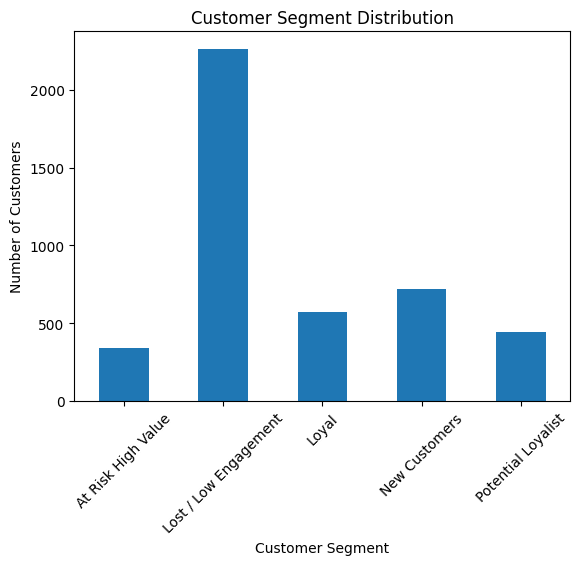

In [ ]:
rfm['CustomerProfile'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar')

plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


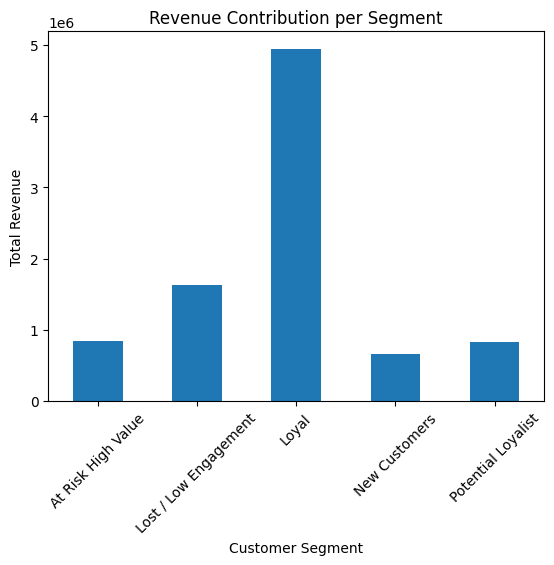

In [ ]:
rfm.groupby('CustomerProfile')['Monetary'].sum().plot(kind='bar')
plt.title('Revenue Contribution per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

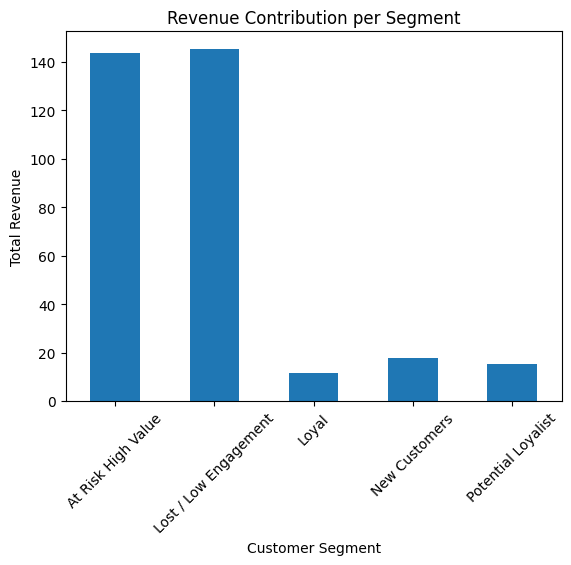

In [ ]:
rfm.groupby('CustomerProfile')['Recency'].mean().plot(kind='bar')
plt.title('Revenue Contribution per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

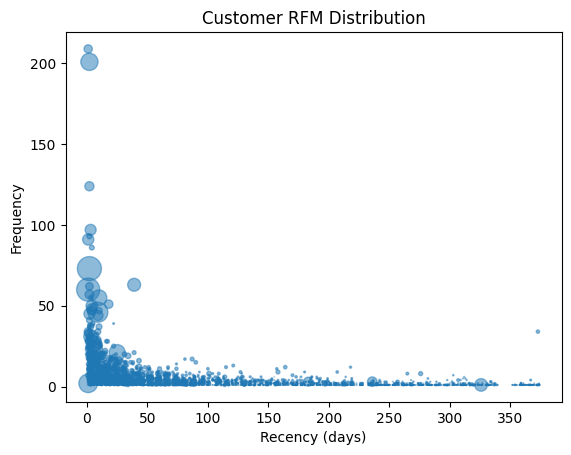

In [ ]:
plt.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    s=rfm['Monetary'] / rfm['Monetary'].max() * 300,
    alpha=0.5
)
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Customer RFM Distribution')
plt.show()

# DOWNLOAD ANALYSIS RESULT (CSV)

In [ ]:
# Bersihin CustomerID di df_clean
df_clean['CustomerID'] = (
    df_clean['CustomerID']
    .astype(str)
    .str.replace('.0', '', regex=False)
)

# Bersihin CustomerID di rfm
rfm['CustomerID'] = (
    rfm['CustomerID']
    .astype(str)
    .str.replace('.0', '', regex=False)
)


In [ ]:
# Customer-level table
rfm_dashboard = rfm[['CustomerID','CustomerProfile','Recency','Frequency','Monetary']].copy()
rfm_dashboard.to_csv('rfm_customer_dashboard.csv', index=False)

# Transaction-level table with profile
df_dashboard = df_clean.merge(
    rfm[['CustomerID','CustomerProfile']],
    on='CustomerID',
    how='left'
)
df_dashboard.to_csv('transactions_dashboard.csv', index=False)
